# Implementación de una técnica de Machine Learning
Cristofer Becerra Sánchez

- **Dataset**: [Vinos](https://github.com/crisb-7/Evidencia02-WineClassification/blob/bc502b04605e2fd18f3e6b1e3b637e2ea3dc2156/wine.data)
- **Algoritmo**: Regresión logística con dos características (Alcohol y Flavonoides).
- **Random State**: 0
- **Exactitud promedio**: 94.44%
- **Precisión promedio**: 91.56%
- **Sensibilidad (Recall) promedio**: 92.53%
- **F1 promedio**: 91.93%

# Configurar Colab e importar paquetes

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [ ]:
%cd "/content/gdrive/MyDrive/7mo Semestre/Datasets/Wine/"
!ls  # show current directory

/content/gdrive/MyDrive/7mo Semestre/Datasets/Wine
3dlol.png  wine.data  wine.names


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['figure.dpi'] = 150

# Funciones

La primera función hace una separación aleatoria de los datos en los grupos de entrenamiento y prueba.

In [ ]:
def trainValidate(df, percentSplit):
  n = len(df)
  n_train = round(n*percentSplit)

  train = df.sample(n = n_train, random_state = 0)
  
  validate = df.drop(train.index)

  return train, validate

logisticRegression() computa el gradiente descendiente de la regresión logística para 1, 2 y 4 características lineales al pasarle la función de hipótesis $h_\theta$.

In [ ]:
def logisticRegression(x1, y, h, alpha, theta, iter, x2 = 0, x3 = 0, x4 = 0,):

  nTheta = len(theta)
  n_train = len(y)

  if nTheta == 2:

    for i in range(iter):
      th0 = theta[0] - (alpha/n_train)*np.sum( h(x1, theta) - y)
      th1 = theta[1] - (alpha/n_train)*np.sum( (h(x1, theta) - y)*x1)
      theta = [th0, th1]

  elif nTheta == 3:

    for i in range(iter):
      th0 = theta[0] - (alpha/n_train)*np.sum( h(x1, x2, theta) - y)
      th1 = theta[1] - (alpha/n_train)*np.sum( (h(x1, x2, theta) - y)*x1)
      th2 = theta[2] - (alpha/n_train)*np.sum( (h(x1, x2, theta) - y)*x2)
      theta = [th0, th1, th2]

  elif nTheta == 5:
    for i in range(iter):
      th0 = theta[0] - (alpha/n_train)*np.sum( h(x1, x2, x3, x4, theta) - y)
      th1 = theta[1] - (alpha/n_train)*np.sum( (h(x1, x2, x3, x4, theta) - y)*x1)
      th2 = theta[2] - (alpha/n_train)*np.sum( (h(x1, x2, x3, x4, theta) - y)*x2)
      th3 = theta[3] - (alpha/n_train)*np.sum( (h(x1, x2, x3, x4, theta) - y)*x3)
      th4 = theta[4] - (alpha/n_train)*np.sum( (h(x1, x2, x3, x4, theta) - y)*x4)
      theta = [th0, th1, th2, th3, th4]
  
  print(theta)
  
  return theta

lrPredict() utiliza los coeficientes $\theta_i$ calculados para realizar las predicciones para 1, 2, y 4 características.

In [ ]:
def lrPredict(theta, h, x1, x2 = 0, x3 = 0, x4 = 0):

  nTheta = len(theta)

  if nTheta == 2:

    prediction = h(x1, theta)
    roundPrediction = np.round_(prediction).astype(int)

  elif nTheta == 3:
    
    prediction = h(x1, x2, theta) 
    roundPrediction = np.round_(prediction).astype(int)

  elif nTheta == 5:

    prediction = h(x1, x2, x3, x4, theta)
    roundPrediction = np.round_(prediction).astype(int)

  return prediction, roundPrediction

modelEval() computa las métricas de desempeño del algoritmo de clasificación.

In [ ]:
def modelEval(y_validate, y_predict):
  
  M = pd.DataFrame({"Verdadero": y_validate, "Prediccion": y_predict})
  n = len(M)

  vp = ((M["Verdadero"] == 1) & (M["Prediccion"] == 1)).sum()
  vn = ((M["Verdadero"] == 0) & (M["Prediccion"] == 0)).sum()
  fp = ((M["Verdadero"] == 0) & (M["Prediccion"] == 1)).sum()
  fn = ((M["Verdadero"] == 1) & (M["Prediccion"] == 0)).sum()

  confusionM = np.array([[vp, fn], [fp, vn]])
  print(confusionM)
  print("\n")

  accuracy = (vp + vn)/(vp + vn + fp + fn)
  if vp + fp == 0:
    precision = 0
  else:
    precision = vp/(vp + fp)
  recall = vp/(vp + fn)
  if precision + recall == 0:
    f1Score = 0
  else:
    f1Score = (2*precision*recall)/(precision + recall)

  return accuracy, precision, recall, f1Score

binaryClassify() agrupa varias de las funciones anteriores para hacer la regresión.

In [ ]:
def binaryClassify(train, validate, x1String, yString, h, alpha, theta, iter, x2Str = 0, x3Str = 0, x4Str = 0):

  y_train = train[yString]
  y_validate = validate[yString]

  x1_train = train[x1String]
  x1_validate = validate[x1String]

  if len(theta) == 2:

    theta = logisticRegression(x1_train, y_train, h, alpha, theta, iter)
    y_predict, y_predict_round = lrPredict(theta, h, x1_validate)

  elif len(theta) == 3:

    x2_train = train[x2Str]
    x2_validate = validate[x2Str]

    theta = logisticRegression(x1_train, y_train, h, alpha, theta, iter, x2 = x2_train)
    y_predict, y_predict_round = lrPredict(theta, h, x1_validate, x2_validate)

  elif len(theta) == 5:

      x2_train = train[x2Str]
      x3_train = train[x3Str]
      x4_train = train[x4Str]

      x2_validate = validate[x2Str]
      x3_validate = validate[x3Str]
      x4_validate = validate[x4Str]

      theta = logisticRegression(x1_train, y_train, h, alpha, theta, iter, x2 = x2_train, x3 = x3_train, x4 = x4_train)
      y_predict, y_predict_round = lrPredict(theta, h, x1 = x1_validate, x2 = x2_validate, x3 = x3_validate, x4 = x4_validate) 
  
  plt.rcParams['figure.figsize'] = (8, 5)
  fig, axs = plt.subplots(2)
  axs[0].scatter(x1_validate, y_validate)
  axs[0].scatter(x1_validate, y_predict)
  axs[1].scatter(x1_validate, y_validate)
  axs[1].scatter(x1_validate, y_predict_round)

  return y_validate, y_predict

# Importar el dataset

Primero se definen los nombres de las columnas y se importa el dataset

In [ ]:
columnsWine = ["WineID", "Alcohol", "MalicAcid", "Ash", "AlcalinityOfAsh", "Magnesium", "TotalPhenols", "Flavanoids", "NonflavanoidPhenols",
               "Proanthocyanins", "ColorIntensity", "Hue", "OD280/OD315", "Proline"]

df = pd.read_csv("wine.data", names = columnsWine)

# Explorar el Data Frame

In [ ]:
df.head()

,WineID,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#sns.pairplot(df, hue = "WineID")

Crear las variables dummy para cada categoría de vino

In [ ]:
df["WineA"] = (df["WineID"] == 1).replace({True: 1, False: 0})
df["WineB"] = (df["WineID"] == 2).replace({True: 1, False: 0})
df["WineC"] = (df["WineID"] == 3).replace({True: 1, False: 0})
df.head()

,WineID,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,WineA,WineB,WineC
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0


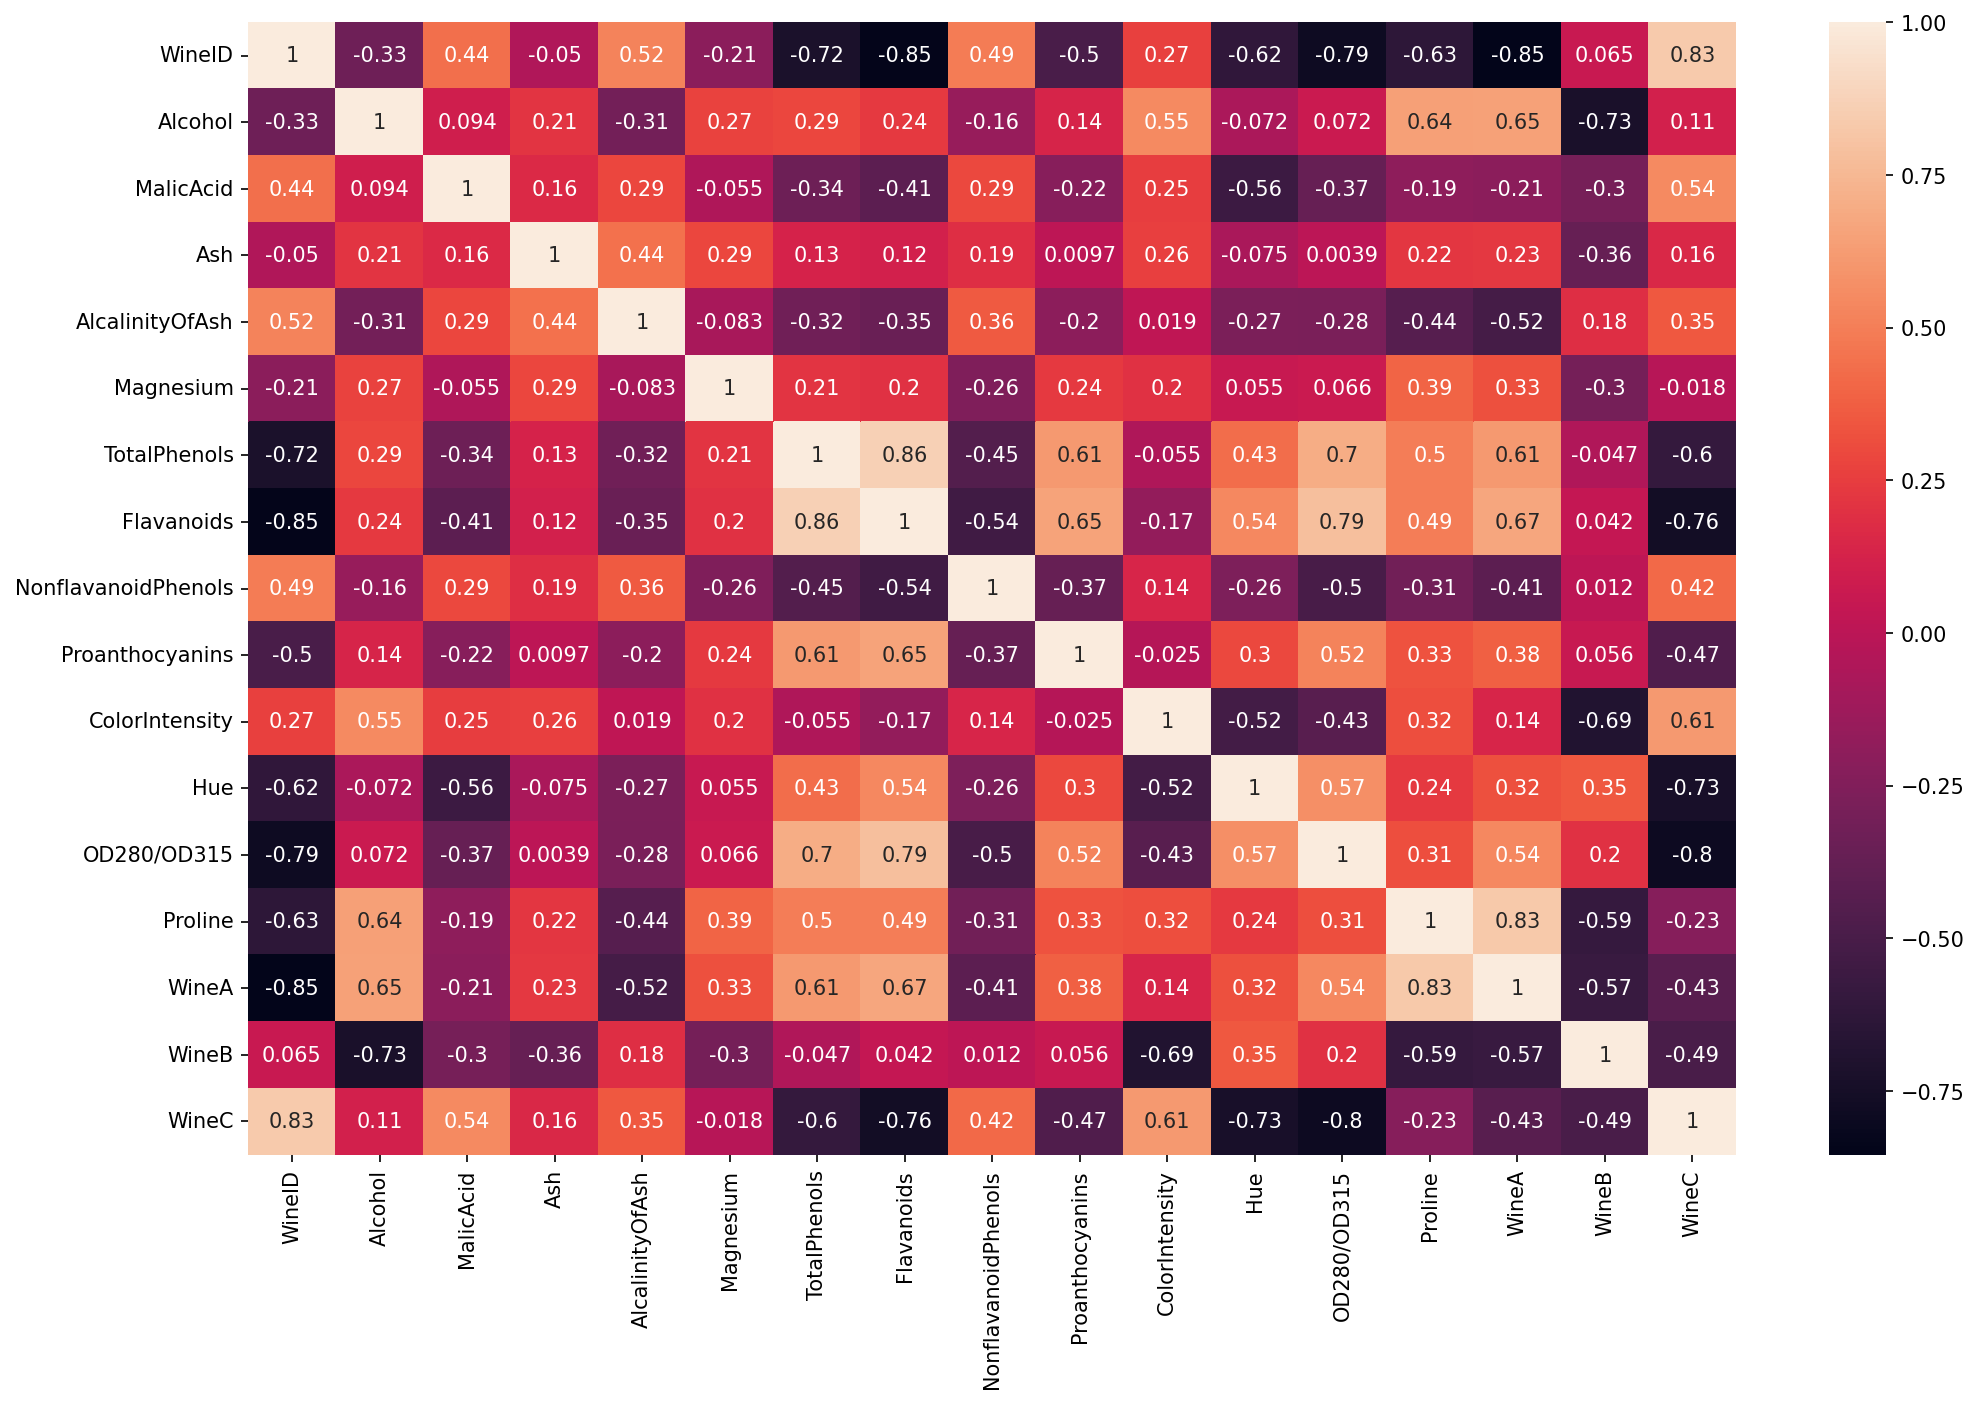

In [ ]:
plt.rcParams['figure.figsize'] = (16, 10)
sns.heatmap(df.corr(), annot=True)
plt.show()

## Separación entrenamiento-prueba

In [ ]:
percentSplit = 0.8
train, validate = trainValidate(df, percentSplit)

In [ ]:
train.head()

,WineID,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,WineA,WineB,WineC
54,1,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060,1,0,0
151,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480,0,0,1
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,0,1,0
55,1,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120,1,0,0
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,0,1,0


In [ ]:
validate.head()

,WineID,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline,WineA,WineB,WineC
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1,0,0
21,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770,1,0,0
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,1,0,0
29,1,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035,1,0,0
31,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515,1,0,0


# Regresión Logística: 2 características lineales

Se definen 2 strings para cada característica $x_1, x_2$.

In [ ]:
x1String = "Alcohol"
x2String = "OD280/OD315"

Se define la función de hipótesis de la regresión logística,

$$
h_\theta = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2)}}
$$

In [ ]:
h = lambda x, y, thetaH: 1/(1 + np.exp(-(thetaH[0] + thetaH[1]*x + thetaH[2]*y)))

## 3 Clasificadores Binarios

Debido a que se desea hacer un clasificador multiclase, se implementan tres clasificadores binarios, uno para cada clase.

Se inicializan los parámetros de la regresión del primer clasificador binario (Vino A): el tamaño de paso, los coeficientes de regresión y el número de iteraciones.

[-1.2472377058234103, -0.22029112419321273, 1.3155500335257189]


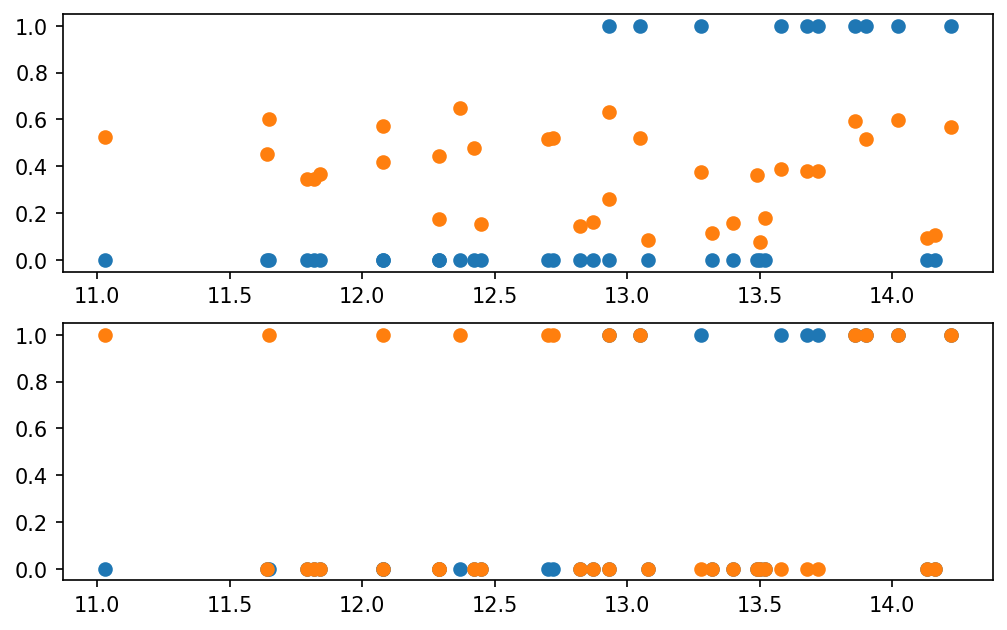

In [ ]:
alpha = 0.05
theta = [1, 1, 1]
iter = 2000
y_validateA, y_predictA = binaryClassify(train, validate, x1String, "WineA", h, alpha, theta, iter, x2Str= x2String)

El segundo clasificador binario (Vino B):

[2.710941764102433, -0.4743780378136567, 1.1008701154547211]


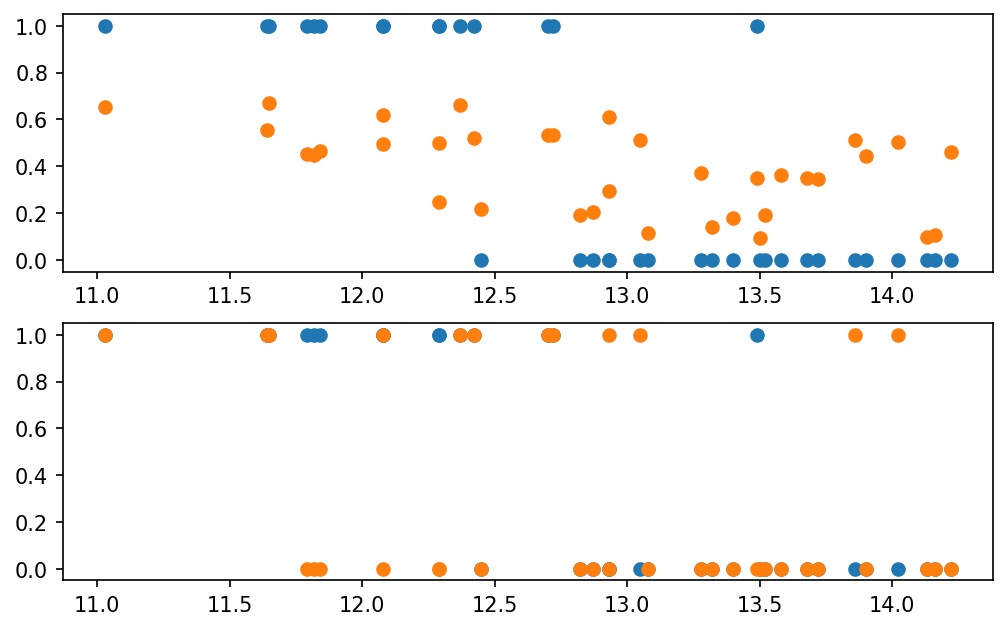

In [ ]:
alpha = 0.05
theta = [1, 1, 1]
iter = 2000
y_validateB, y_predictB = binaryClassify(train, validate, x1String, "WineB", h, alpha, theta, iter, x2Str= x2String)

El tercer y último clasificador binario (Vino C):

[0.837912734176264, 0.6549910269785465, -4.619937222829437]


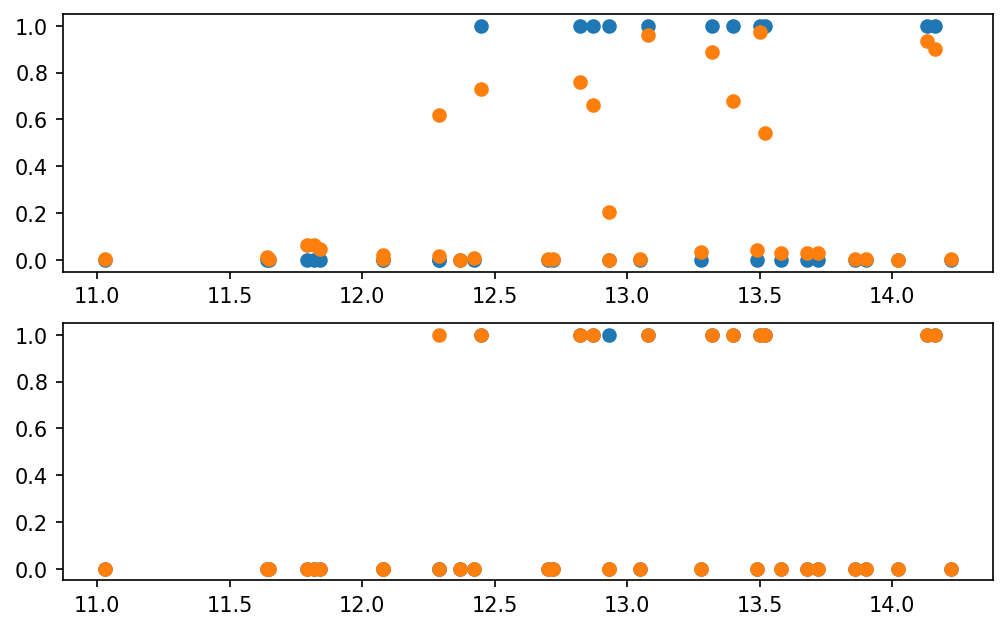

In [ ]:
alpha = 0.05
theta = [1, 1, 1]
iter = 2000
y_validateC, y_predictC = binaryClassify(train, validate, x1String, "WineC", h, alpha, theta, iter, x2Str= x2String)

## Métricas de Desempeño

Se integran las predicciones de cada clasificador en tres columnas; a partir de estas tres se crea una nueva columna similar a la columna *WineID*.

In [ ]:
validate["A"] = y_predictA
validate["B"] = y_predictB
validate["C"] = y_predictC

bestPredictA = validate.groupby("WineA").get_group(1)[["A", "B", "C"]].idxmax(axis = 1)
bestPredictB = validate.groupby("WineB").get_group(1)[["A", "B", "C"]].idxmax(axis = 1)
bestPredictC = validate.groupby("WineC").get_group(1)[["A", "B", "C"]].idxmax(axis = 1)

multiClass = pd.concat([bestPredictA, bestPredictB, bestPredictC], axis = 0).replace({"A": 1, "B": 2, "C": 3})
validate["MultiClass"] = multiClass
validate = validate.drop(["A", "B", "C"], axis = 1)

validate["PredA"] = (validate["MultiClass"] == 1).replace({True: 1, False: 0})
validate["PredB"] = (validate["MultiClass"] == 2).replace({True: 1, False: 0})
validate["PredC"] = (validate["MultiClass"] == 3).replace({True: 1, False: 0})

Se realizan las evaluaciones para cada clasificador binario

In [ ]:
accuracyA, precisionA, recallA, f1ScoreA = modelEval(validate["WineA"], validate["PredA"])
accuracyB, precisionB, recallB, f1ScoreB = modelEval(validate["WineB"], validate["PredB"])
accuracyC, precisionC, recallC, f1ScoreC = modelEval(validate["WineC"], validate["PredC"])

[[10  0]
 [ 1 25]]


[[13  2]
 [ 1 20]]


[[10  1]
 [ 1 24]]




Se calculan las métricas del clasificador multiclase a partir del promedio de los clasificadores binarios.

In [ ]:
macroAccuracy = np.mean([accuracyA, accuracyB, accuracyC])
macroPrecision = np.mean([precisionA, precisionB, precisionC])
macroRecall = np.mean([recallA, recallB, recallC])
macroF1 = np.mean([f1ScoreA, f1ScoreB, f1ScoreC])

print("Avg Accuracy:  " + str(round(macroAccuracy, 4)))
print("Avg Precision: " + str(round(macroPrecision, 4)))
print("Avg Recall:    " + str(round(macroRecall, 4)))
print("Avg F1-Score:  " + str(round(macroF1, 4)))

Avg Accuracy:  0.9444
Avg Precision: 0.9156
Avg Recall:    0.9253
Avg F1-Score:  0.9193


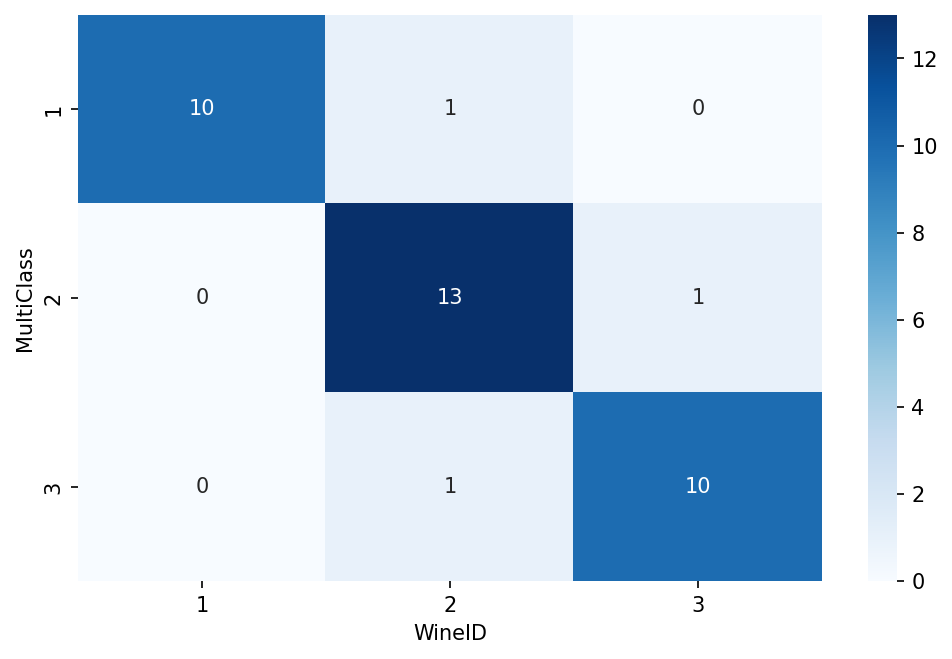

In [ ]:
confusionM = pd.crosstab(validate["MultiClass"], validate["WineID"])
sns.heatmap(confusionM, annot = True, cmap = "Blues")